In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import datasets
from skimage import io
from tqdm import tqdm
import os
import numpy as np


In [38]:
data_path= '../input/utkface-new/UTKFace'

In [39]:
from skimage import transform
from skimage import color
def load_utkface_dataset(data_path):
    images = []
    labels_gender = []
    labels_ethnicity = []
    
    for filename in os.listdir(data_path):
        if filename.endswith('.jpg'):
            image_path = os.path.join(data_path, filename)
            try:
                age, gender, ethnicity = map(int, filename.split('_')[:3])
            except ValueError as e:
                print(f"Skipping file {filename} due to error: {e}")
                continue
            
            labels_gender.append(gender)
            labels_ethnicity.append(ethnicity)
            img = io.imread(image_path)
            img = transform.resize(img, (128, 128)) 
            img = color.rgb2gray(img)  
            images.append(img)

    return np.array(images), np.array(labels_gender), np.array(labels_ethnicity)


In [40]:
load_utkface_dataset(data_path)

Skipping file 61_1_20170109142408075.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170109142408075.jpg.chip.jpg'
Skipping file 61_1_20170109150557335.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170109150557335.jpg.chip.jpg'
Skipping file 39_1_20170116174525125.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170116174525125.jpg.chip.jpg'


(array([[[0.04258294, 0.02313144, 0.02397432, ..., 0.09954444,
          0.15859067, 0.18213208],
         [0.04969799, 0.01519758, 0.01590015, ..., 0.06797736,
          0.12261093, 0.16418727],
         [0.07370422, 0.01273192, 0.00758833, ..., 0.04544297,
          0.09864387, 0.15858337],
         ...,
         [0.17997877, 0.14362975, 0.09574198, ..., 0.01400513,
          0.01560731, 0.01728389],
         [0.15709946, 0.11606546, 0.06217992, ..., 0.00592028,
          0.01177401, 0.02214847],
         [0.18865773, 0.14281724, 0.0798239 , ..., 0.00169649,
          0.01461097, 0.03452877]],
 
        [[0.0135171 , 0.01383382, 0.01102864, ..., 0.07630425,
          0.10822577, 0.13247268],
         [0.01667955, 0.01664411, 0.0141302 , ..., 0.09990409,
          0.1340297 , 0.16023699],
         [0.01711322, 0.01777488, 0.01487266, ..., 0.11698741,
          0.15385504, 0.17689075],
         ...,
         [0.33770259, 0.33889243, 0.3396686 , ..., 0.28073335,
          0.27851256, 0.

In [41]:
images, labels_gender, labels_ethnicity = load_utkface_dataset(data_path)
images_flat = images.reshape(images.shape[0], -1)

Skipping file 61_1_20170109142408075.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170109142408075.jpg.chip.jpg'
Skipping file 61_1_20170109150557335.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170109150557335.jpg.chip.jpg'
Skipping file 39_1_20170116174525125.jpg.chip.jpg due to error: invalid literal for int() with base 10: '20170116174525125.jpg.chip.jpg'


In [42]:
pca = PCA(n_components=100)
images_pca = pca.fit_transform(images_flat)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_gender)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(images_pca, labels_encoded, test_size=0.2, random_state=42)


In [44]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [45]:
y_pred = nb_classifier.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 79.69%


[0.797985657034381, 0.7945053786121071, 0.7970892216831892, 0.7931343598396963, 0.7899177388736554, 0.7764712086057793, 0.7833263024678337, 0.7710398650073824, 0.7794241721155875]
[0.797721999578148, 0.7981438515081206, 0.7985657034380932, 0.797721999578148, 0.7975110736131618, 0.7863319974688884, 0.7878084792237925, 0.7747310693946425, 0.7827462560641215]


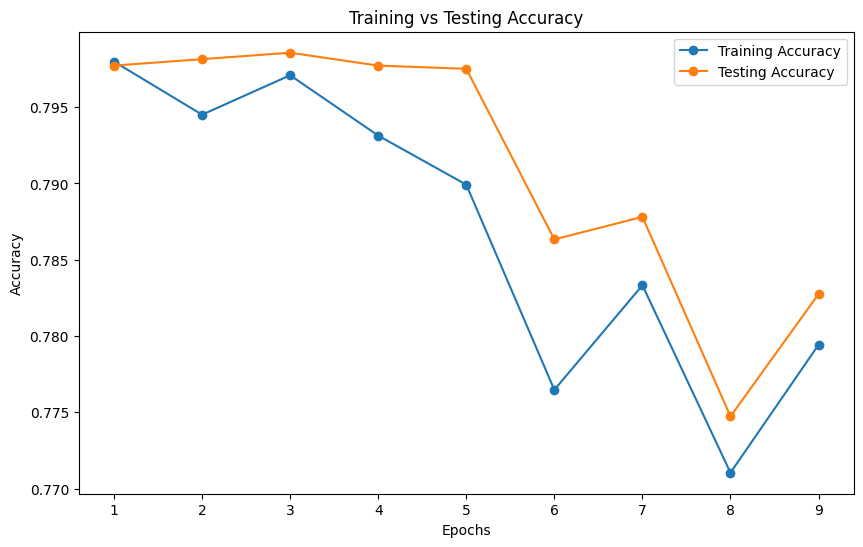

In [47]:
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
X_train, X_test, y_train, y_test = train_test_split(images_pca, labels_encoded, test_size=0.2, random_state=42)

for i in range(1,10):
    X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_train, y_train, test_size=(i*10)/100, random_state=42)
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_n, y_train_n)
    train_pred = nb_classifier.predict(X_train)
    test_pred = nb_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
print(train_accuracies)
print(test_accuracies)
# Plot the accuracies
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_accuracies) + 1)
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(epochs, test_accuracies, marker='o', label='Testing Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()  # Show legend to distinguish between training and testing accuracy

# Display the plot
plt.show()

In [48]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_ethnicity)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(images_pca, labels_encoded, test_size=0.2, random_state=42)

In [50]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 55.71%


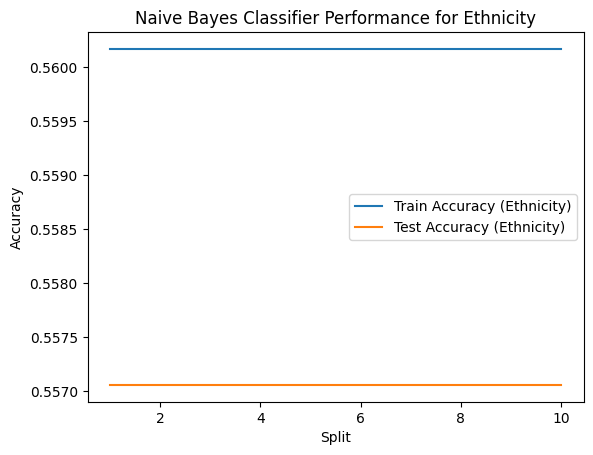

In [52]:

train_accuracies_ethnicity = []
test_accuracies_ethnicity = []

num_splits = 10

for _ in range(num_splits):
    X_train, X_test, y_train_ethnicity, y_test_ethnicity = train_test_split(
        images_pca, labels_ethnicity, test_size=0.2, random_state=42
    )

    nb_classifier_ethnicity = GaussianNB()
    nb_classifier_ethnicity.fit(X_train, y_train_ethnicity)

    train_pred_ethnicity = nb_classifier_ethnicity.predict(X_train)
    test_pred_ethnicity = nb_classifier_ethnicity.predict(X_test)

    train_accuracy_ethnicity = accuracy_score(y_train_ethnicity, train_pred_ethnicity)
    test_accuracy_ethnicity = accuracy_score(y_test_ethnicity, test_pred_ethnicity)

    train_accuracies_ethnicity.append(train_accuracy_ethnicity)
    test_accuracies_ethnicity.append(test_accuracy_ethnicity)

plt.plot(range(1, num_splits + 1), train_accuracies_ethnicity, label='Train Accuracy (Ethnicity)')
plt.plot(range(1, num_splits + 1), test_accuracies_ethnicity, label='Test Accuracy (Ethnicity)')

plt.xlabel('Split')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Naive Bayes Classifier Performance for Ethnicity')
plt.show()